In [1]:
#These are many of the libraries we've been using.  

library(dplyr) 
library(tidytext)
library(textdata)
library(ggplot2)
library(partykit)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm




Load in the data here.  You'll need to upload it first into codio.  Use "File"(the top file, there are two) then "upload" then drag and drop.


In [2]:
QbStats1 <- read.csv("QbStats00-20.csv", stringsAsFactors = FALSE)
head(QbStats1)

WrStats1 <- read.csv("WrStats00-20.csv", stringsAsFactors = FALSE)
head(WrStats1)

,Rk,Player,Tm,Age,Pos,G,GS,Cmp,Att,Cmp.,⋯,Int,Int.,X1D,Lng,Y.A,Y.C,Y.G,Rate,QBR,Year
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,Deshaun Watson*,HOU,25,QB,16,16,382,544,70.2,⋯,7,1.3,221,77,8.9,12.6,301.4,112.4,70.5,2020
2,2,Patrick Mahomes*,KAN,25,QB,15,15,390,588,66.3,⋯,6,1.0,238,75,8.1,12.2,316.0,108.2,82.9,2020
3,3,Tom Brady,TAM,43,QB,16,16,401,610,65.7,⋯,12,2.0,233,50,7.6,11.6,289.6,102.2,72.5,2020
4,4,Matt Ryan,ATL,35,QB,16,16,407,626,65.0,⋯,11,1.8,242,63,7.3,11.3,286.3,93.3,67.0,2020
5,5,Josh Allen*,BUF,24,QB,16,16,396,572,69.2,⋯,10,1.7,228,55,7.9,11.5,284.0,107.2,81.7,2020
6,6,Justin Herbert,LAC,22,QB,15,15,396,595,66.6,⋯,10,1.7,216,72,7.3,10.9,289.1,98.3,69.5,2020


,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch.,Yds,Y.R,TD,X1D,Lng,Y.Tgt,R.G,Y.G,Year
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,1,Stefon Diggs*+,BUF,27,WR,16,15,166,127,76.50%,1535,12.1,8,73,55,9.2,7.9,95.9,2020
2,2,Travis Kelce*+,KAN,31,TE,15,15,145,105,72.40%,1416,13.5,11,79,45,9.8,7.0,94.4,2020
3,3,DeAndre Hopkins*,ARI,28,WR,16,16,160,115,71.90%,1407,12.2,6,75,60,8.8,7.2,87.9,2020
4,4,Justin Jefferson*,MIN,21,WR,16,14,125,88,70.40%,1400,15.9,7,58,71,11.2,5.5,87.5,2020
5,5,Davante Adams*+,GNB,28,WR,14,14,149,115,77.20%,1374,11.9,18,73,56,9.2,8.2,98.1,2020
6,6,Calvin Ridley,ATL,26,WR,15,15,143,90,62.90%,1374,15.3,9,65,63,9.6,6.0,91.6,2020



Create AllPro column for QbStats (True if player was selected as an All-Pro that season)


In [3]:
asterick <- grepl("*", QbStats1$Player, fixed = TRUE)
plus <- grepl("+", QbStats1$Player, fixed = TRUE)

QbStats1 <-
 QbStats1 %>%
 mutate(ProBowl = asterick) %>%
 mutate(ProBowl = as.factor(ProBowl)) %>%
 mutate(AllPro = plus) %>%
 mutate(AllPro = as.factor(AllPro))

dim(QbStats1)
head(QbStats1)

QbStats <- 
 QbStats1 %>%
 filter(Rk <= 30) %>%
 mutate(Player = gsub("\\*", "", Player)) %>%
 mutate(Player = gsub("\\+", "", Player))

dim(QbStats)
head(QbStats)

[1] 840  25

,Rk,Player,Tm,Age,Pos,G,GS,Cmp,Att,Cmp.,⋯,X1D,Lng,Y.A,Y.C,Y.G,Rate,QBR,Year,ProBowl,AllPro
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>
1,1,Deshaun Watson*,HOU,25,QB,16,16,382,544,70.2,⋯,221,77,8.9,12.6,301.4,112.4,70.5,2020,TRUE,FALSE
2,2,Patrick Mahomes*,KAN,25,QB,15,15,390,588,66.3,⋯,238,75,8.1,12.2,316.0,108.2,82.9,2020,TRUE,FALSE
3,3,Tom Brady,TAM,43,QB,16,16,401,610,65.7,⋯,233,50,7.6,11.6,289.6,102.2,72.5,2020,FALSE,FALSE
4,4,Matt Ryan,ATL,35,QB,16,16,407,626,65.0,⋯,242,63,7.3,11.3,286.3,93.3,67.0,2020,FALSE,FALSE
5,5,Josh Allen*,BUF,24,QB,16,16,396,572,69.2,⋯,228,55,7.9,11.5,284.0,107.2,81.7,2020,TRUE,FALSE
6,6,Justin Herbert,LAC,22,QB,15,15,396,595,66.6,⋯,216,72,7.3,10.9,289.1,98.3,69.5,2020,FALSE,FALSE


[1] 630  25

,Rk,Player,Tm,Age,Pos,G,GS,Cmp,Att,Cmp.,⋯,X1D,Lng,Y.A,Y.C,Y.G,Rate,QBR,Year,ProBowl,AllPro
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>
1,1,Deshaun Watson,HOU,25,QB,16,16,382,544,70.2,⋯,221,77,8.9,12.6,301.4,112.4,70.5,2020,TRUE,FALSE
2,2,Patrick Mahomes,KAN,25,QB,15,15,390,588,66.3,⋯,238,75,8.1,12.2,316.0,108.2,82.9,2020,TRUE,FALSE
3,3,Tom Brady,TAM,43,QB,16,16,401,610,65.7,⋯,233,50,7.6,11.6,289.6,102.2,72.5,2020,FALSE,FALSE
4,4,Matt Ryan,ATL,35,QB,16,16,407,626,65.0,⋯,242,63,7.3,11.3,286.3,93.3,67.0,2020,FALSE,FALSE
5,5,Josh Allen,BUF,24,QB,16,16,396,572,69.2,⋯,228,55,7.9,11.5,284.0,107.2,81.7,2020,TRUE,FALSE
6,6,Justin Herbert,LAC,22,QB,15,15,396,595,66.6,⋯,216,72,7.3,10.9,289.1,98.3,69.5,2020,FALSE,FALSE



Create AllPro column for WrStats (True if player was selected as an All-Pro that season)


In [4]:
asterick <- grepl("*", WrStats1$Player, fixed = TRUE)
plus <- grepl("+", WrStats1$Player, fixed = TRUE)

WrStats1 <-
 WrStats1 %>%
 mutate(ProBowl = asterick) %>%
 mutate(ProBowl = as.factor(ProBowl)) %>%
 mutate(AllPro = plus) %>%
 mutate(AllPro = as.factor(AllPro))

head(WrStats1)

WrStats <- 
 WrStats1 %>%
 mutate(Player = gsub("\\*", "", Player)) %>%
 mutate(Player = gsub("\\+", "", Player)) %>%
 mutate(Ctch. = gsub("\\%", "", Ctch.)) %>%
 mutate(Ctch. = as.double(Ctch.))

head(WrStats)

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch.,⋯,Y.R,TD,X1D,Lng,Y.Tgt,R.G,Y.G,Year,ProBowl,AllPro
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>
1,1,Stefon Diggs*+,BUF,27,WR,16,15,166,127,76.50%,⋯,12.1,8,73,55,9.2,7.9,95.9,2020,TRUE,TRUE
2,2,Travis Kelce*+,KAN,31,TE,15,15,145,105,72.40%,⋯,13.5,11,79,45,9.8,7.0,94.4,2020,TRUE,TRUE
3,3,DeAndre Hopkins*,ARI,28,WR,16,16,160,115,71.90%,⋯,12.2,6,75,60,8.8,7.2,87.9,2020,TRUE,FALSE
4,4,Justin Jefferson*,MIN,21,WR,16,14,125,88,70.40%,⋯,15.9,7,58,71,11.2,5.5,87.5,2020,TRUE,FALSE
5,5,Davante Adams*+,GNB,28,WR,14,14,149,115,77.20%,⋯,11.9,18,73,56,9.2,8.2,98.1,2020,TRUE,TRUE
6,6,Calvin Ridley,ATL,26,WR,15,15,143,90,62.90%,⋯,15.3,9,65,63,9.6,6.0,91.6,2020,FALSE,FALSE


,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch.,⋯,Y.R,TD,X1D,Lng,Y.Tgt,R.G,Y.G,Year,ProBowl,AllPro
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>
1,1,Stefon Diggs,BUF,27,WR,16,15,166,127,76.5,⋯,12.1,8,73,55,9.2,7.9,95.9,2020,TRUE,TRUE
2,2,Travis Kelce,KAN,31,TE,15,15,145,105,72.4,⋯,13.5,11,79,45,9.8,7.0,94.4,2020,TRUE,TRUE
3,3,DeAndre Hopkins,ARI,28,WR,16,16,160,115,71.9,⋯,12.2,6,75,60,8.8,7.2,87.9,2020,TRUE,FALSE
4,4,Justin Jefferson,MIN,21,WR,16,14,125,88,70.4,⋯,15.9,7,58,71,11.2,5.5,87.5,2020,TRUE,FALSE
5,5,Davante Adams,GNB,28,WR,14,14,149,115,77.2,⋯,11.9,18,73,56,9.2,8.2,98.1,2020,TRUE,TRUE
6,6,Calvin Ridley,ATL,26,WR,15,15,143,90,62.9,⋯,15.3,9,65,63,9.6,6.0,91.6,2020,FALSE,FALSE


Summaries of Datasets

In [5]:
summary(QbStats)
summary(WrStats)


       Rk          Player               Tm                 Age       
 Min.   : 1.0   Length:630         Length:630         Min.   :21.00  
 1st Qu.: 8.0   Class :character   Class :character   1st Qu.:25.00  
 Median :15.5   Mode  :character   Mode  :character   Median :28.00  
 Mean   :15.5                                         Mean   :28.87  
 3rd Qu.:23.0                                         3rd Qu.:32.00  
 Max.   :30.0                                         Max.   :43.00  
     Pos                  G               GS             Cmp       
 Length:630         Min.   : 7.00   Min.   : 5.00   Min.   :126.0  
 Class :character   1st Qu.:13.00   1st Qu.:12.00   1st Qu.:233.0  
 Mode  :character   Median :15.00   Median :15.00   Median :292.0  
                    Mean   :14.29   Mean   :13.91   Mean   :288.6  
                    3rd Qu.:16.00   3rd Qu.:16.00   3rd Qu.:345.0  
                    Max.   :16.00   Max.   :16.00   Max.   :471.0  
      Att             Cmp.        

       Rk           Player               Tm                 Age       
 Min.   : 1.00   Length:840         Length:840         Min.   :21.00  
 1st Qu.:10.75   Class :character   Class :character   1st Qu.:25.00  
 Median :20.50   Mode  :character   Mode  :character   Median :27.00  
 Mean   :20.50                                         Mean   :27.25  
 3rd Qu.:30.25                                         3rd Qu.:29.00  
 Max.   :40.00                                         Max.   :41.00  
     Pos                  G              GS             Tgt       
 Length:840         Min.   : 9.0   Min.   : 0.00   Min.   : 75.0  
 Class :character   1st Qu.:15.0   1st Qu.:13.00   1st Qu.:109.0  
 Mode  :character   Median :16.0   Median :15.00   Median :125.0  
                    Mean   :15.5   Mean   :14.03   Mean   :126.5  
                    3rd Qu.:16.0   3rd Qu.:16.00   3rd Qu.:142.0  
                    Max.   :17.0   Max.   :16.00   Max.   :205.0  
      Rec             Ctch.       

In [6]:
Qb_training <- QbStats[1:480,]
Qb_test <- QbStats[480:630,]



Model formula:
ProBowl ~ Cmp + Cmp. + Yds + TD. + Int + Int. + Y.A + Y.C + Y.G + 
    Rate + QBR

Fitted party:
[1] root
|   [2] Rate <= 94.2
|   |   [3] Yds <= 3352: FALSE (n = 188, err = 4.8%)
|   |   [4] Yds > 3352: FALSE (n = 145, err = 26.9%)
|   [5] Rate > 94.2
|   |   [6] Yds <= 2647: FALSE (n = 15, err = 6.7%)
|   |   [7] Yds > 2647
|   |   |   [8] TD. <= 5.9: TRUE (n = 78, err = 39.7%)
|   |   |   [9] TD. > 5.9: TRUE (n = 54, err = 14.8%)

Number of inner nodes:    4
Number of terminal nodes: 5

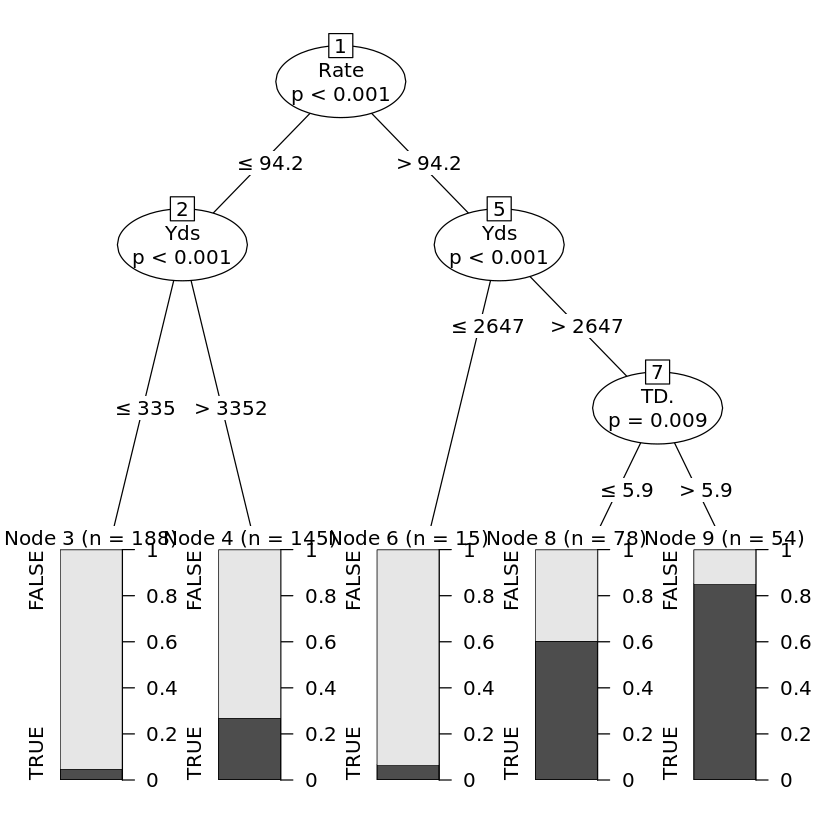

In [7]:
Training_tree <- ctree(ProBowl ~ Cmp + Cmp. + Yds + TD. + Int + Int. + Y.A + Y.C + Y.G + Rate + QBR, data = Qb_training)
Training_tree
plot(Training_tree)

In [8]:
predict_data <- predict(Training_tree, newdata = Qb_test)
prediction_table <- table("Predicted" = predict_data, "Actual" = Qb_test$ProBowl)
prediction_table

pred_prop <- prop.table(prediction_table) * 100
pred_prop

pred_prop["FALSE", "FALSE"] + pred_prop["TRUE", "TRUE"]
pred_prop["FALSE", "TRUE"] + pred_prop["TRUE", "FALSE"]

         Actual
Predicted FALSE TRUE
    FALSE   111   22
    TRUE      2   16

         Actual
Predicted     FALSE      TRUE
    FALSE 73.509934 14.569536
    TRUE   1.324503 10.596026

[1] 84.10596

[1] 15.89404

In [9]:
ProBowlTable <- table("PB" = QbStats$ProBowl)
ProBowlTable

PB
FALSE  TRUE 
  450   180 

Our model takes the quartbacks from years 2000-2016 and allows you to predict whether a quarterback from 2017-2020 was a Pro Bowler with an 84.1% correct rate and a 15.9% incorrect rate. Out of the 630 quarterbacks in this dataset, 180 were Pro Bowlers and 450 were not. Without this model, your best chance at guessing would be to guess no every time which would come out to a correct rate of 71.4% and an incorrect rate of 28.6%. 

Cooper Kupp Stats Extrapolated over Full season:
Tgt = (136 / 12) * 17 = 193
Rec = (100 / 12) * 17 = 142
Ctch. = 73.5
Yds = (1366 / 12) * 17 = 1935 
Y.R = 13.7
TD = (11 / 12) * 17 = 16
X1D = (64 / 12) * 17 = 91
Lng = 59
Y.Tgt = 10.0
R.G = 8.3
Y.G = 113.8
Year = 2021
ProBowl = TRUE
AllPro = TRUE


Cooper Kupp is on a historical pace right now in the 2021 season so we added his current stats extrapolated over a full 17 game season to see how his stats would compare with the best from the past 20 years. Obviously his stats will be somewhat inflated because this is the first season ever that will be 17 games, but that didn't stop stats becoming records when the season was initially expanded to 16 games in 1978 from 14 games. As you can see, he would sit in the top 10 in touchdowns, receptions, and yards over the last 20 seasons. And there's only one player in the past 20 years that would be in the top 10 in all those categories: him.

In [10]:
NewRow <- data.frame(Rk = 1, Player = "Cooper Kupp", Tm = "LAR", Age = 28, Pos = "WR", G = 17, GS = 17, Tgt = 193, 
                    Rec = 142, Ctch. = 73.5, Yds = 1935, Y.R = 13.7, TD = 16, X1D = 91, Lng = 59, Y.Tgt = 10.0,
                    R.G = 8.3, Y.G = 113.8, Year= 2021, ProBowl = TRUE, AllPro = TRUE)
WrStats <- rbind(WrStats, NewRow)

In [11]:
WrStats %>%
 filter(Player == "Cooper Kupp")

Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch.,⋯,Y.R,TD,X1D,Lng,Y.Tgt,R.G,Y.G,Year,ProBowl,AllPro
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
22,Cooper Kupp,LAR,27,WR,15,12,124,92,74.2,⋯,10.6,3,45,55,7.9,6.1,64.9,2020,FALSE,FALSE
11,Cooper Kupp,LAR,26,WR,16,14,134,94,70.1,⋯,12.4,10,51,66,8.7,5.9,72.6,2019,FALSE,FALSE
20,Cooper Kupp,LAR,24,wr,15,6,94,62,66.0,⋯,14.0,5,42,64,9.2,4.1,57.9,2017,FALSE,FALSE
1,Cooper Kupp,LAR,28,WR,17,17,193,142,73.5,⋯,13.7,16,91,59,10.0,8.3,113.8,2021,TRUE,TRUE


In [12]:
WrStats %>%
 slice_max(TD, n = 10) %>%
 select(Player, TD)

Player,TD
<chr>,<dbl>
Randy Moss,23
Davante Adams,18
Rob Gronkowski,17
Randy Moss,17
Dez Bryant,16
Jimmy Graham,16
Calvin Johnson,16
Braylon Edwards,16
Muhsin Muhammad,16


In [13]:
WrStats %>%
 slice_max(Rec, n = 10) %>%
 select(Player, Rec)

Player,Rec
<chr>,<dbl>
Michael Thomas,149
Marvin Harrison,143
Cooper Kupp,142
Julio Jones,136
Antonio Brown,136
Antonio Brown,129
Stefon Diggs,127
Michael Thomas,125
Wes Welker,123


In [14]:
WrStats %>%
 slice_max(Yds, n = 10) %>%
 select(Player, Yds)

Player,Yds
<chr>,<dbl>
Calvin Johnson,1964
Cooper Kupp,1935
Julio Jones,1871
Antonio Brown,1834
Michael Thomas,1725
Marvin Harrison,1722
Antonio Brown,1698
Torry Holt,1696
Calvin Johnson,1681


In [15]:
WrStats %>%
 filter(Yds >= 1677 & Rec >= 122 & TD >= 16) %>%
 select(Player)

Player
<chr>
Cooper Kupp


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 863.67”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 297.33”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 9.3379e+05”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”
Warning message in predLoess(object$y,

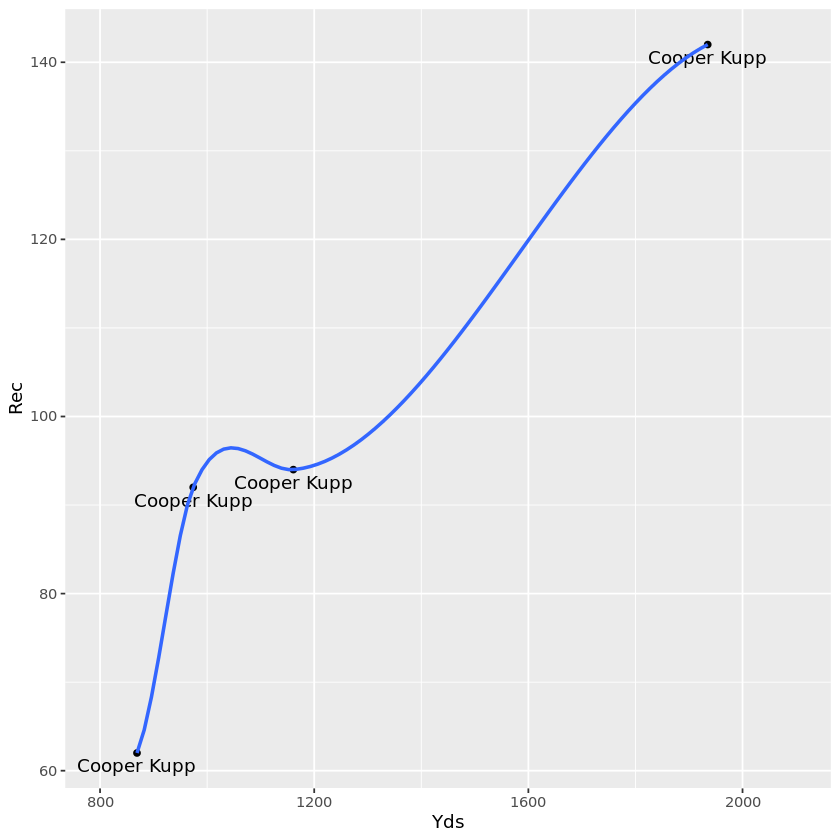

In [16]:
WrStats %>%
 filter(Player == "Cooper Kupp") %>%
ggplot(aes(x = Yds, y = Rec, label = Player)) +
 geom_point() +
 geom_text(vjust = 1.5) +
 geom_smooth() +
 coord_cartesian(xlim = c(800,2100))

In [17]:
WrStats %>%
 filter(Player == "Cooper Kupp") %>%
 select(Player, TD, Year) %>%
 arrange(-TD)

Player,TD,Year
<chr>,<dbl>,<dbl>
Cooper Kupp,16,2021
Cooper Kupp,10,2019
Cooper Kupp,5,2017
Cooper Kupp,3,2020


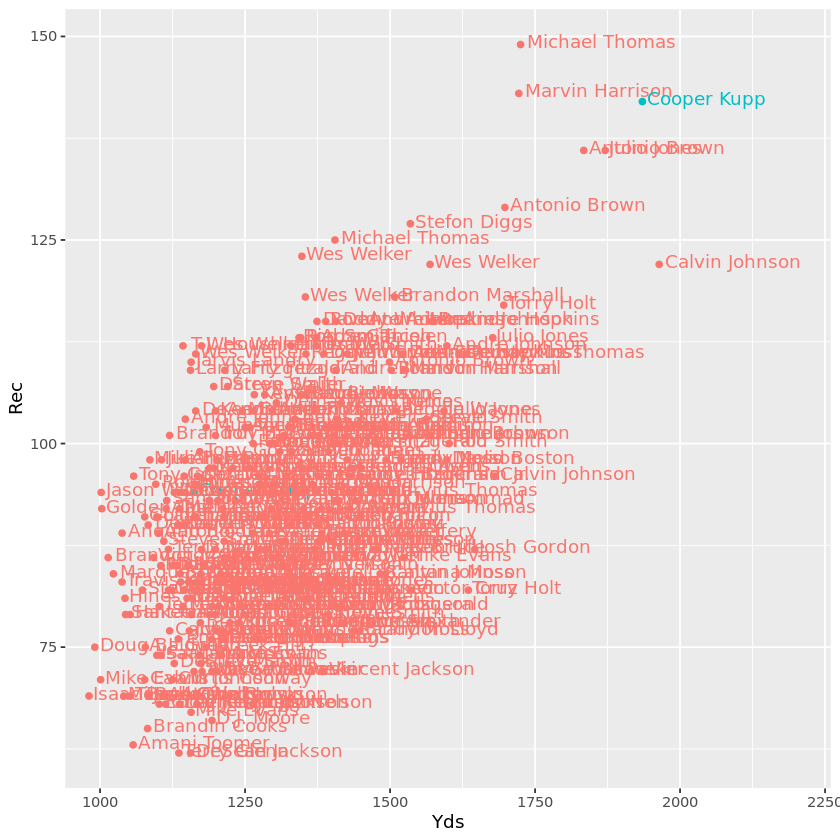

In [18]:
WrStats %>%
 filter(Rk <= 15) %>%
ggplot(aes(x = Yds, Rec, color = (Player=="Cooper Kupp"))) +
 geom_point() +
 geom_text(aes(label = Player), vjust = .3, hjust = -.04) +
 coord_cartesian(xlim = c(1000,2200)) +
 theme(legend.position = "none")

Compare the standard deviations of the outliars of each stat

In [19]:
WrStatsFilter <-
 WrStats %>% 
 filter(Pos == "WR" | Pos == "wr")

In [20]:
sdCmpPercent <- (max(QbStats$Cmp.) - mean(QbStats$Cmp.)) / sd(QbStats$Cmp.)
sdInt <- (max(QbStats$Int) - mean(QbStats$Int)) / sd(QbStats$Int)


In [21]:
sdTD <- (max(WrStats$TD) - mean(WrStats$TD)) / sd(WrStats$TD)

Drew Brees had 6 of the top 10 completion percentages of in the past 20 years, his 2019 year of 74.4% being 12.6% higher than the average of 61.8% over the past 20 years, or 2.93 standard deviations more.

In [22]:
QbStats %>%
 slice_max(Cmp., n = 10) %>%
 select(Player, Cmp., Cmp, Att, Year)

Player,Cmp.,Cmp,Att,Year
<chr>,<dbl>,<int>,<int>,<int>
Drew Brees,74.4,364,489,2018
Drew Brees,74.3,281,378,2019
Drew Brees,72.0,386,536,2017
Sam Bradford,71.6,395,552,2016
Drew Brees,71.2,468,657,2011
Aaron Rodgers,70.7,372,526,2020
Drew Brees,70.6,363,514,2009
Drew Brees,70.5,275,390,2020
Derek Carr,70.4,361,513,2019


In 2007, Randy Moss scored 23 touchdowns, which is an absurd 4.96 standard deviations away from the mean of 6.5. No one in the past 20 years has scored more than 18 touchdowns in a game. Randy Moss averaged 1.44 touchdowns per GAME that season

In [23]:
WrStats %>%
 slice_max(TD, n = 10) %>%
 select(Player, TD, Year)

Player,TD,Year
<chr>,<dbl>,<dbl>
Randy Moss,23,2007
Davante Adams,18,2020
Rob Gronkowski,17,2011
Randy Moss,17,2003
Dez Bryant,16,2014
Jimmy Graham,16,2013
Calvin Johnson,16,2011
Braylon Edwards,16,2007
Muhsin Muhammad,16,2004


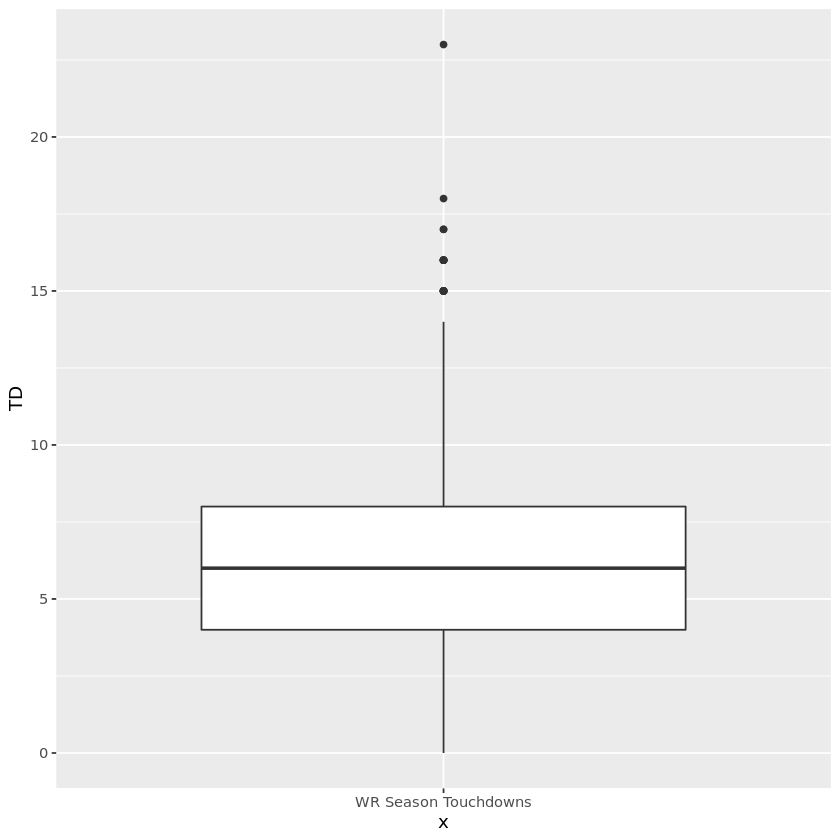

In [24]:
WrStats %>%
ggplot(aes(x = "WR Season Touchdowns", y = TD)) +
 geom_boxplot()

Jameis Winston in 2019 threw for over 5000 yards, which has only been done 11 times since 2000, while also managing to throw for 30 interceptions in the same season. I could get into the stats behind this one, but this one speaks for itself. I can confidently say that throwing for 319 yards per game while also throwing almost 2 interceptions per game will never be done again.

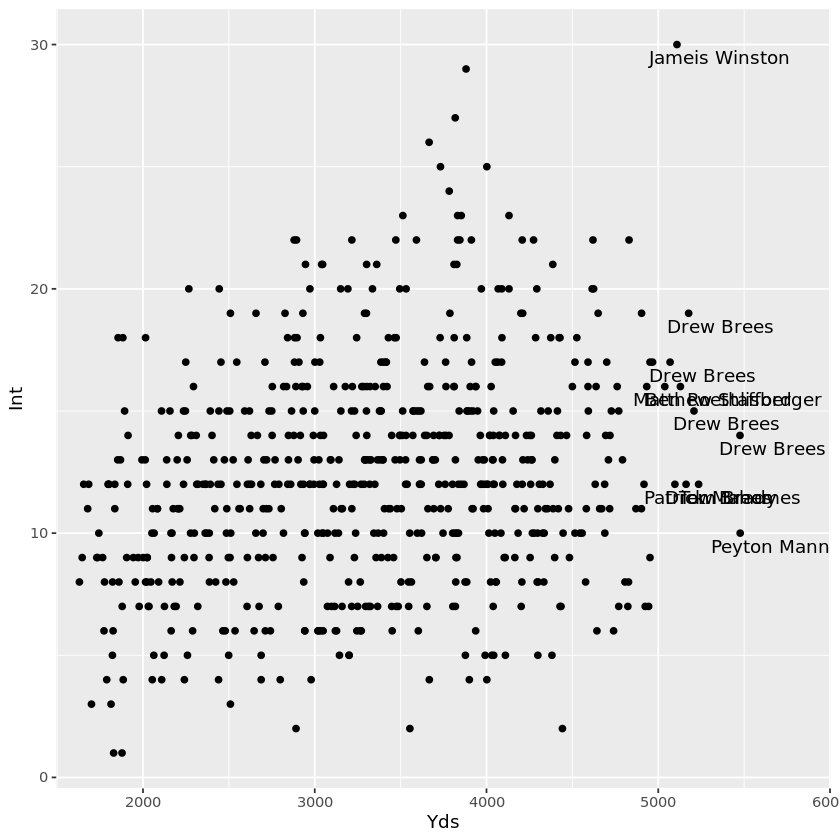

In [25]:
QbStats %>%
ggplot(aes(x = Yds, y = Int, label = Player)) +
 geom_point() +
 geom_text(aes(label = ifelse(Yds > 5000, as.character(Player),'')), hjust = .2, vjust = 1.5) +
 coord_cartesian(xlim = c(1700,5800))

In [26]:
QbStats %>%
 filter(Yds > 5000) %>%
 select(Player, Yds, Int, Y.G, Year) %>%
 arrange(-Int)

Player,Yds,Int,Y.G,Year
<chr>,<int>,<int>,<dbl>,<int>
Jameis Winston,5109,30,319.3,2019
Drew Brees,5177,19,323.6,2012
Drew Brees,5069,17,316.8,2008
Ben Roethlisberger,5129,16,320.6,2018
Matthew Stafford,5038,16,314.9,2011
Drew Brees,5208,15,325.5,2016
Drew Brees,5476,14,342.3,2011
Patrick Mahomes,5097,12,318.6,2018
Drew Brees,5162,12,322.6,2013


Based on the Yards/Reception and Receptions/Game of the top 20 ranked players from each year in this dataset, we were able to create 3 clusters of players, which divided them among their playstyle. Cluster 1 contains players that are more possesion type receivers, or guys who catch more passes throughout the game but go for less yardage. They run shorter routes and are more reliable to catch the ball for short conversions. Cluster 2 contains guys who are either mid-route guys or guys who can do everything. They average in the middle for R/G and Y/R  due to running mid-range routes, their ability to gain more yards after the short catches, or they do a little of everything and it averages out to the middle. Cluster 3 contains the spread-the-field, deep ball threats. They often run deep routes that gain a lot of yards, but they don't get as many receptions because they don't get open as often as the short route runners and not as many plays are designed for them to get the ball. The quarterback isn't as accurate throwing the ball so deep downfield, so their catch percentage is lower, but they pick up big yards when they do connect.

In [75]:
WrStatsNarrow <- WrStats %>%
 filter(Rk <= 20) %>%
 select(Player, TD, Y.R, R.G)
WrStatsNarrow

Player,TD,Y.R,R.G
<chr>,<dbl>,<dbl>,<dbl>
Stefon Diggs,8,12.1,7.9
Travis Kelce,11,13.5,7.0
DeAndre Hopkins,6,12.2,7.2
Justin Jefferson,7,15.9,5.5
Davante Adams,18,11.9,8.2
Calvin Ridley,9,15.3,6.0
D.K. Metcalf,10,15.7,5.2
Tyreek Hill,15,14.7,5.8
Allen Robinson,6,12.3,6.4


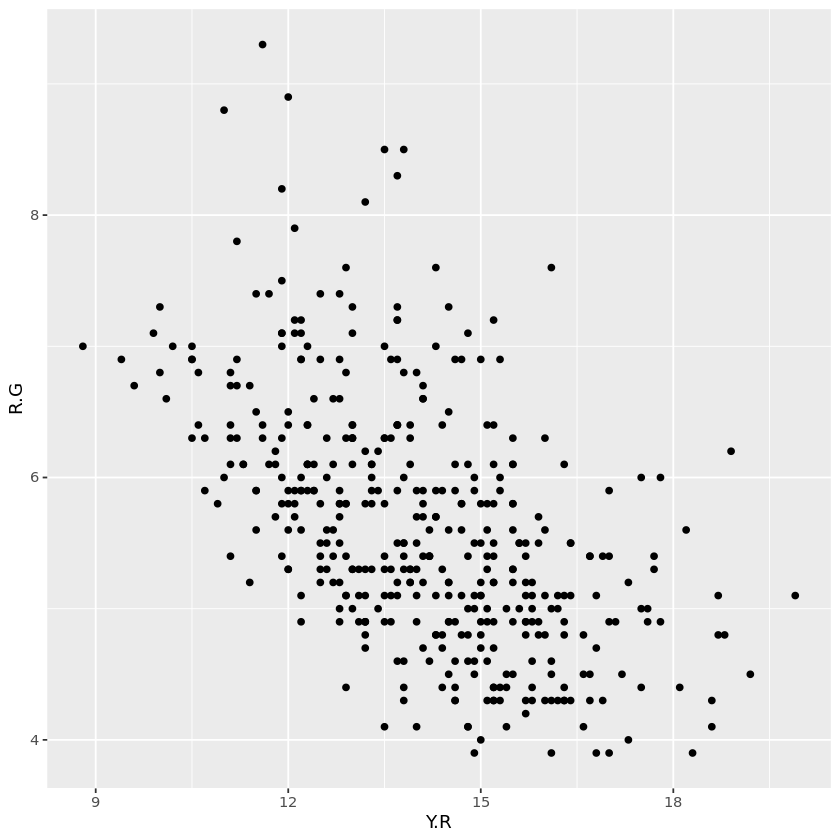

In [74]:
WrStatsNarrow %>%
ggplot(aes(x = Y.R, y = R.G)) +
 geom_point()

In [76]:
distance <- dist(WrStatsNarrow[,3:4])
distance_scaled <- distance %>%
 scale()

distance

             1          2          3          4          5          6
2    1.6643317                                                       
3    0.7071068  1.3152946                                            
4    4.4944410  2.8301943  4.0718546                                 
5    0.3605551  2.0000000  1.0440307  4.8259714                      
6    3.7215588  2.0591260  3.3241540  0.7810250  4.0496913           
7    4.5000000  2.8425341  4.0311289  0.3605551  4.8414874  0.8944272
8    3.3421550  1.6970563  2.8653098  1.2369317  3.6878178  0.6324555
9    1.5132746  1.3416408  0.8062258  3.7107951  1.8439089  3.0265492
10   1.5000000  2.3194827  1.1180340  4.8507731  1.6552945  4.1593269
11   6.9462220  5.2839379  6.5306967  2.4596748  7.2718636  3.2249031
12   3.2649655  1.7464249  2.6907248  1.7029386  3.6235342  1.2529964
13   2.2472205  1.3416408  1.5652476  3.0149627  2.6000000  2.4083189
14   2.1000000  1.8439089  1.4035669  3.8118237  2.4083189  3.2062439
15   2.0880613  2.28

In [77]:
clusters <- hclust(distance)
clusters


Call:
hclust(d = distance)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 421 


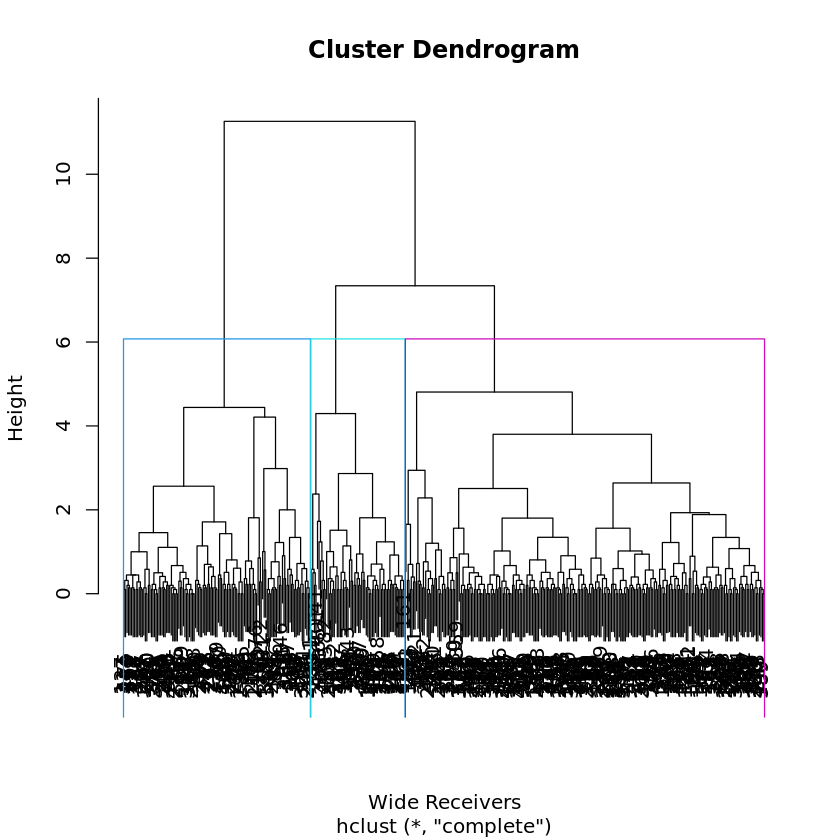

In [78]:
plot(clusters, xlab = "Wide Receivers")
rect.hclust(clusters, k = 3, border = 4:6)

In [79]:
sub_group <- cutree(clusters, k = 3)
table(sub_group)

sub_group
  1   2   3 
123 236  62 

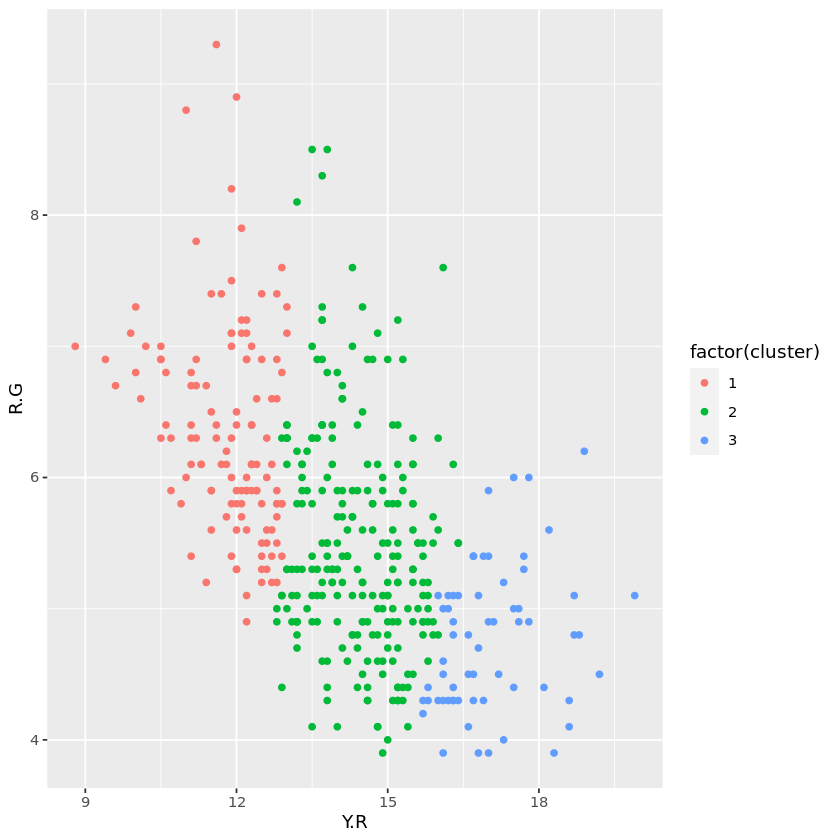

In [80]:
WrClusters <- WrStatsNarrow %>%
 as_tibble() %>%
 mutate(cluster = sub_group)

WrClusters %>%
ggplot(aes(x = Y.R, y = R.G)) +
 geom_point(aes(color = factor(cluster)))

In [95]:
WrStatsClusters <- 
 WrStats %>%
 filter(Rk <= 20) %>%
 as_tibble() %>%
 mutate(cluster = sub_group)

WrStatsClusters %>%
 filter(cluster == 1) %>%
 summarize(Avg_Y.R = mean(Y.R), Avg_Yds = mean(Yds), Avg_R.G = mean(R.G), Avg_Rec = mean(Rec), Avg_Ctch. = mean(Ctch.), Avg_Tgt = mean(Tgt), Avg_Long = mean(Lng))

WrStatsClusters %>%
 filter(cluster == 2) %>%
 summarize(Avg_Y.R = mean(Y.R), Avg_Yds = mean(Yds), Avg_R.G = mean(R.G), Avg_Rec = mean(Rec), Avg_Ctch. = mean(Ctch.), Avg_Tgt = mean(Tgt), Avg_Long = mean(Lng))

WrStatsClusters %>%
 filter(cluster == 3) %>%
 summarize(Avg_Y.R = mean(Y.R), Avg_Yds = mean(Yds), Avg_R.G = mean(R.G), Avg_Rec = mean(Rec), Avg_Ctch. = mean(Ctch.), Avg_Tgt = mean(Tgt), Avg_Long = mean(Lng))

Avg_Y.R,Avg_Yds,Avg_R.G,Avg_Rec,Avg_Ctch.,Avg_Tgt,Avg_Long
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.84146,1174.837,6.35935,99.4878,66.70081,149.7642,53.82114


Avg_Y.R,Avg_Yds,Avg_R.G,Avg_Rec,Avg_Ctch.,Avg_Tgt,Avg_Long
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.43008,1239.508,5.497034,86.07627,61.34153,140.7161,63.86441


Avg_Y.R,Avg_Yds,Avg_R.G,Avg_Rec,Avg_Ctch.,Avg_Tgt,Avg_Long
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17.05,1264.71,4.762903,74.06452,57.36935,129.9516,72.85484


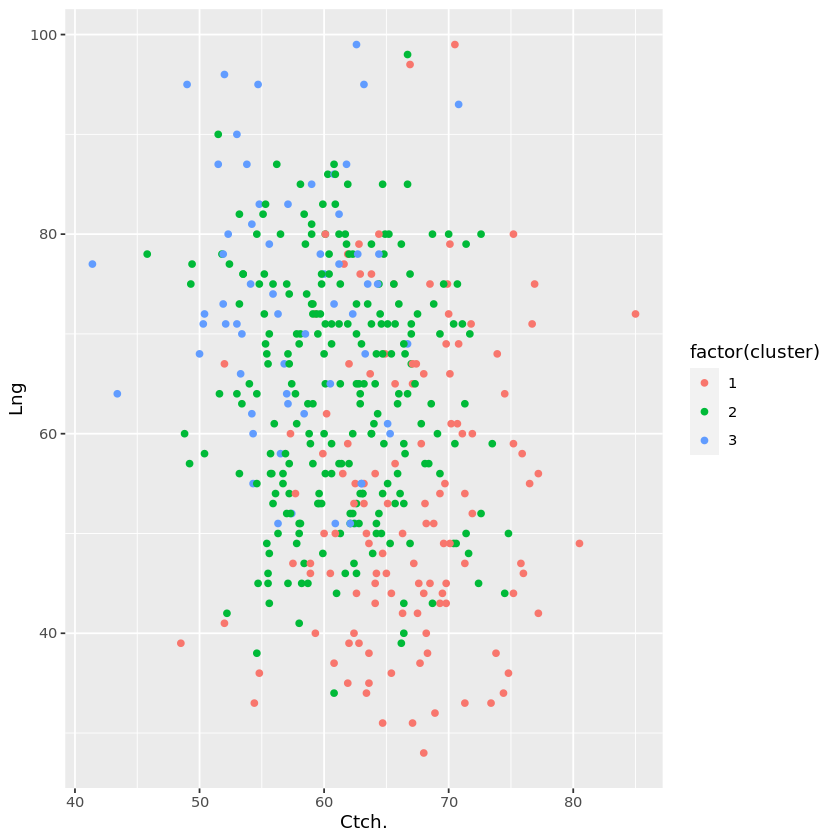

In [96]:
WrStatsClusters %>%
ggplot(aes(x = Ctch., y = Lng, color = factor(cluster))) +
 geom_point()

Despite making clusters based off of Y/R and R/G, we found that we were able to compare other stats and the clusters were still able to hold together relatively well.


In [98]:
StarWarsIV <- read.csv("EpisodeIV.csv", stringsAsFactors = FALSE)
head(StarWarsIV)

StarWarsV <- read.csv("EpisodeV.csv", stringsAsFactors = FALSE)
head(StarWarsV)

StarWarsVI <- read.csv("EpisodeVI.csv", stringsAsFactors = FALSE)
head(StarWarsVI)

,Line,Character,Dialogue
,<int>,<chr>,<chr>
1,1,THREEPIO,Did you hear that? They've shut down the main reactor. We'll be destroyed for sure. This is madness!
2,2,THREEPIO,We're doomed!
3,3,THREEPIO,There'll be no escape for the Princess this time.
4,4,THREEPIO,What's that?
5,5,THREEPIO,I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister...
6,6,LUKE,Hurry up! Come with me! What are you waiting for?! Get in gear!


,Line,Character,Dialogue
,<int>,<chr>,<chr>
1,1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do you read me?"
2,2,HAN,"Loud and clear, kid. What's up?"
3,3,LUKE,"Well, I finished my circle. I don't pick up any life readings."
4,4,HAN,There isn't enough life on this ice cube to fill a space cruiser. The sensors are placed. I'm going back.
5,5,LUKE,Right. I'll see you shortly. There's a meteorite that hit the ground near here. I want to check it out. It won't take long.
6,6,LUKE,"Hey, steady girl. What's the matter? You smell something?"


,Line,Character,Dialogue
,<int>,<chr>,<chr>
1,1,SHUTTLE,"CAPTAIN Command station, this is ST 321. Code Clearance Blue. We're starting our approach. Deactivate the security shield."
2,2,DEATH,STAR CONTROLLER The security deflector shield will be deactivated when we have confirmation of your code transmission. Stand by... You are clear to proceed.
3,3,SHUTTLE,CAPTAIN We're starting our approach.
4,4,OFFICER,Inform the commander that Lord Vader's shuttle has arrived.
5,5,OPERATOR,"Yes, sir."
6,6,JERJERROD,"Lord Vader, this is an unexpected pleasure. We're honored by your presence."


In [99]:
AllStarWars <- rbind(StarWarsIV, StarWarsV, StarWarsVI)
AllStarWars
dim(StarWarsIV)
dim(StarWarsV)
dim(StarWarsVI)

Line,Character,Dialogue
<int>,<chr>,<chr>
1,THREEPIO,Did you hear that? They've shut down the main reactor. We'll be destroyed for sure. This is madness!
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister...
6,LUKE,Hurry up! Come with me! What are you waiting for?! Get in gear!
7,THREEPIO,"Artoo! Artoo-Detoo, where are you?"
8,THREEPIO,At last! Where have you been?
9,THREEPIO,They're heading in this direction. What are we going to do? We'll be sent to the spice mines of Kessel or smashed into who knows what!


[1] 1010    3

[1] 839   3

[1] 674   3

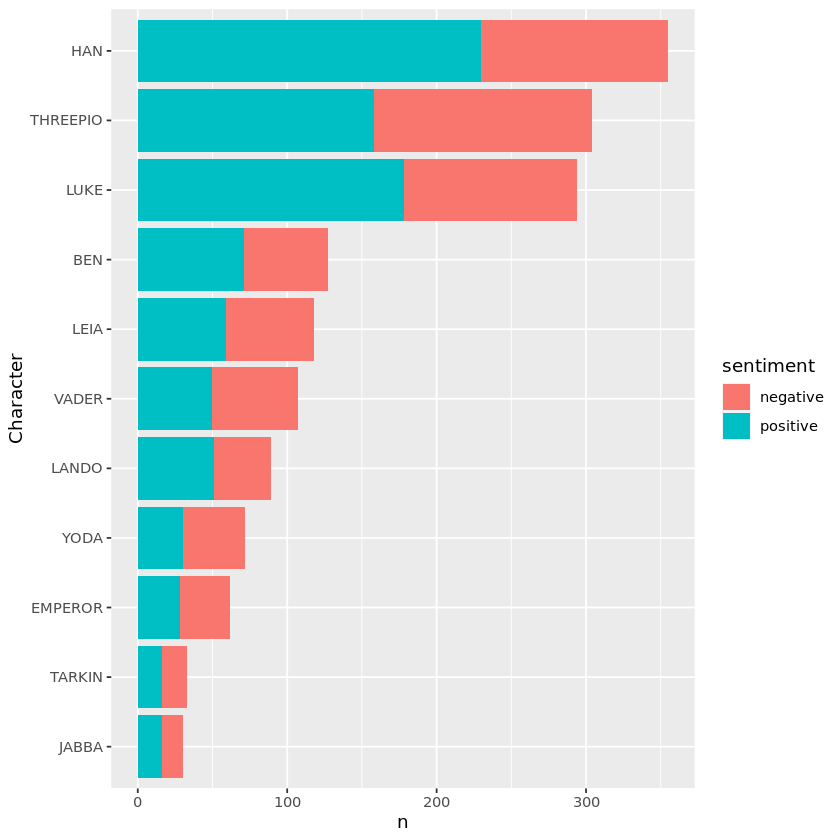

In [132]:
AllStarWars %>%
 unnest_tokens(word, Dialogue) %>%
 inner_join(get_sentiments("bing"), by = "word") %>%
 count(Character, sentiment, sort = TRUE) %>%
 mutate(Character = reorder(Character, n)) %>%
 filter(Character %in% c("HAN", "THREEPIO", "LUKE", "BEN", "LEIA", "VADER", "LANDO", "YODA", "EMPEROR", "TARKIN", "JABBA")) %>%
ggplot() +
 geom_col(aes(x = Character, y = n, fill = sentiment)) +
 coord_flip()

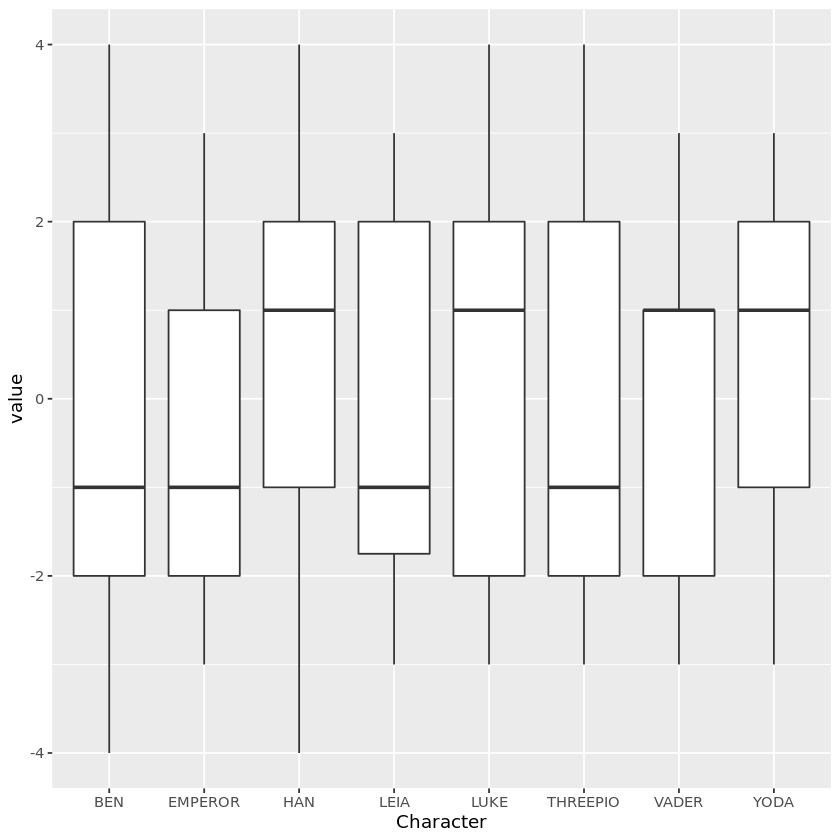

In [176]:
AllStarWars %>%
 unnest_tokens(word, Dialogue) %>%
 inner_join(get_sentiments("afinn"), by = "word") %>%
 filter(Character %in% c("HAN", "THREEPIO", "LUKE", "BEN", "LEIA", "VADER", "EMPEROR", "YODA")) %>%
ggplot() +
 geom_boxplot(aes(x = Character, y = value))
 

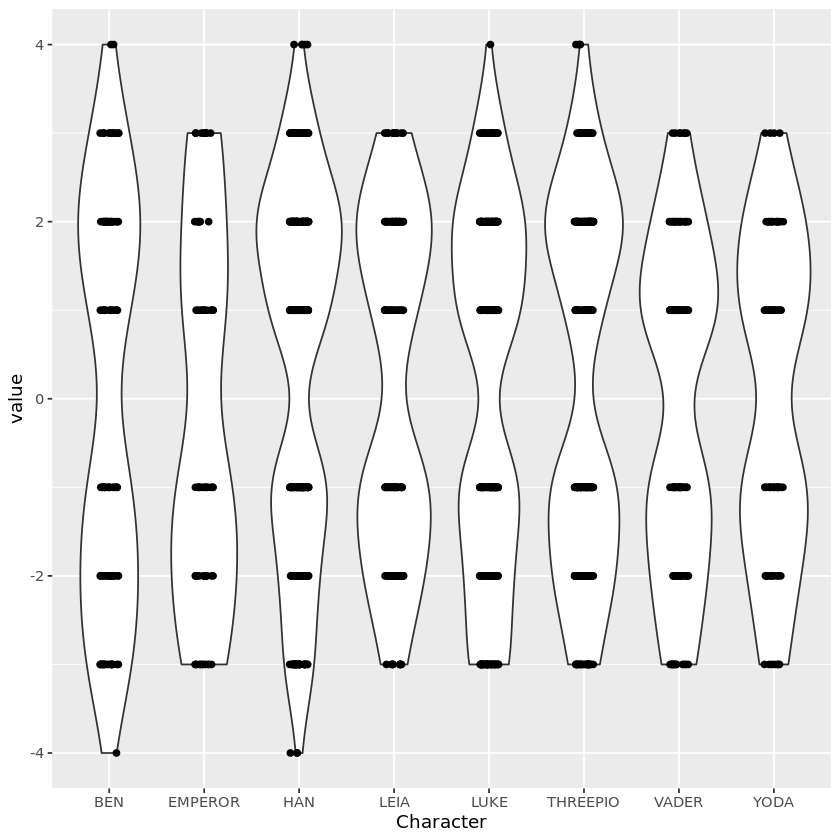

In [177]:
AllStarWars %>%
 unnest_tokens(word, Dialogue) %>%
 inner_join(get_sentiments("afinn"), by = "word") %>%
 filter(Character %in% c("HAN", "THREEPIO", "LUKE", "BEN", "LEIA", "VADER", "EMPEROR", "YODA")) %>%
ggplot(aes(x = Character, y = value)) +
 geom_violin() +
 geom_jitter(height = 0, width = .1)
 

Because we couldn't find much variation between good and bad characters, we decided to look a little deeper into some of Darth Vader's lines because we expected him to score negatively in the sentiments compared to good characters. Proud and ability both have a sentiment of 2, but this line overall is very negative. In line 498, reward has a score of 2 and alive and free have a value of 1, but the line is referring to capturing the Millenium Falcon and the people in it and holding them hostage. Optimistic has a value of 2 but the line is saying referring to not being optimistic. The sentiment of a word can be positive but used in a negative context.

In [158]:
AllStarWars %>%
 filter(Character == "VADER") %>%
 filter(Line %in% c(289, 498, 11))

Line,Character,Dialogue
<int>,<chr>,<chr>
289,VADER,Don't be too proud of this technological terror you've constructed. The ability to destroy a planet is insignificant next to the power of the Force.
498,VADER,"...there will be a substantial reward for the one who finds the Millennium Falcon. You are free to use any methods necessary, but I want them alive. No disintegrations."
11,VADER,The Emperor does not share your optimistic appraisal of the situation.
